In [44]:
import ibmdata
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib.pyplot as plt
%matplotlib inline
ibmdata.set_log_level(ibmdata.logging.INFO)

### Pull OPDB Vmax data and EDA

In [2]:
QUERY = """
SELECT 
    wafer_id, chipx, chipy, kerf_x, kerf_y, OPDB_VMAX,--RADIUS_CENTER_5_NEW,
    CASE 
        WHEN chipx || '_' || chipy IN ('8_43','80_21','89_32','98_54','98_65') THEN 'E3'
        WHEN chipx || '_' || chipy IN ('89_87','8_76') THEN 'E4'
        ElSE 'Other'
    END AS bucket
FROM
    p10dd2.OPDBVmax

"""

opdb_vmax = ibmdata.qdat.query(QUERY)
opdb_vmax['opdb_vmax'] = opdb_vmax['opdb_vmax'].astype(float)

2022-04-05 22:40:38,541 INFO     ibmdata   : query execution time: 0:00:00.316854, fetching rows...
2022-04-05 22:41:49,163 INFO     ibmdata   : read 392866 rows, total 392866, 5563.0 rows/s, total time 0:01:11.036473
2022-04-05 22:41:49,874 INFO     ibmdata   : retrieved (392866, 7) (rows, cols) of data in 0:01:11.747307 from CAYCE


In [3]:
opdb_vmax.opdb_vmax.describe()

count    392866.000000
mean          1.066730
std           0.054187
min          -0.291036
25%           1.070597
50%           1.074267
75%           1.077254
max           1.098493
Name: opdb_vmax, dtype: float64

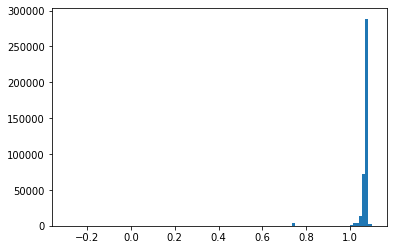

In [4]:
plt.hist(opdb_vmax.opdb_vmax, 100)
plt.show()

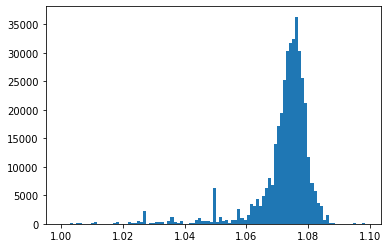

In [5]:
plt.hist(opdb_vmax[opdb_vmax.opdb_vmax >= 1].opdb_vmax, 100)
plt.show()

In [6]:
opdb_vmax[opdb_vmax.opdb_vmax < 1]

,wafer_id,chipx,chipy,kerf_x,kerf_y,opdb_vmax,bucket
6,AZA7P-07,62,10,57,11,-0.132,Other
13,AZA7P-07,62,109,57,110,-0.132,Other
14,AZA7P-07,44,109,39,110,-0.132,Other
29,AZA7P-07,53,10,48,11,-0.072,Other
36,AZA7P-07,26,21,21,22,-0.072,Other
...,...,...,...,...,...,...,...
392704,AZA6Z-07,26,76,21,77,0.750,Other
392705,AZA6Z-07,35,76,30,77,0.750,Other
392706,AZA6Z-07,71,76,66,77,0.750,Other
392707,AZA6Z-07,35,87,30,88,0.750,Other


6196 or 1.6% of the data are outliers

In [7]:
opdb_vmax[opdb_vmax.duplicated()]

,wafer_id,chipx,chipy,kerf_x,kerf_y,opdb_vmax,bucket
10,A1DXC-09,98,65,93,66,1.073640,E3
24,A1DXC-09,35,32,30,33,1.079289,Other
39,A1DXC-09,44,32,39,33,1.079289,Other
48,A1DXC-09,53,32,48,33,1.079289,Other
60,A1DXC-09,62,32,57,33,1.079289,Other
...,...,...,...,...,...,...,...
390105,AZA7B-11,26,98,21,99,0.750000,Other
390107,AZA7B-11,80,98,75,99,0.750000,Other
390109,AZA7B-11,44,109,39,110,0.750000,Other
390111,AZA7B-11,53,109,48,110,0.750000,Other


In [8]:
opdb_vmax[(opdb_vmax.wafer_id == 'A1DXC-09') & (opdb_vmax.chipx == 98)]

,wafer_id,chipx,chipy,kerf_x,kerf_y,opdb_vmax,bucket
7,A1DXC-09,98,65,93,66,1.073640,E3
10,A1DXC-09,98,65,93,66,1.073640,E3
109742,A1DXC-09,98,54,93,55,1.079289,E3
109751,A1DXC-09,98,54,93,55,1.079289,E3
109808,A1DXC-09,98,65,93,66,1.079289,E3
109819,A1DXC-09,98,65,93,66,1.079289,E3
136669,A1DXC-09,98,54,93,55,1.073640,E3
136673,A1DXC-09,98,65,93,66,1.073640,E3
374634,A1DXC-09,98,54,93,55,1.073640,E3
374696,A1DXC-09,98,54,93,55,1.073640,E3


There are 235998 perfectly duplicated rows

In [9]:
392866-235998

156868

In [10]:
df = opdb_vmax.drop_duplicates()
df

,wafer_id,chipx,chipy,kerf_x,kerf_y,opdb_vmax,bucket
0,A1B2D-13,53,32,48,33,1.073456,Other
1,AZAFX-23,80,32,75,33,1.073840,Other
2,A1AY1-04,98,65,93,66,1.076130,E3
3,A1B2D-13,62,32,57,33,1.073456,Other
4,A1B4T-24,26,43,21,44,1.075974,Other
...,...,...,...,...,...,...,...
392861,AZAHX-13,26,98,21,99,1.047090,Other
392862,AZAHX-13,80,98,75,99,1.047090,Other
392863,AZAHX-13,44,109,39,110,1.047090,Other
392864,AZAHX-13,53,109,48,110,1.047090,Other


In [11]:
df[df.duplicated(['wafer_id','chipx','chipy','kerf_x','kerf_y'])]

,wafer_id,chipx,chipy,kerf_x,kerf_y,opdb_vmax,bucket
14650,A1B75-22,89,87,84,88,0.944880,E4
16530,AZA82-01,44,10,39,11,1.062033,Other
16547,AZA82-01,53,10,48,11,1.062033,Other
17719,AZA82-01,62,10,57,11,1.062033,Other
17781,AZA82-01,26,21,21,22,1.062033,Other
...,...,...,...,...,...,...,...
392188,AZA29-03,26,98,21,99,0.658500,Other
392189,AZA29-03,80,98,75,99,1.053900,Other
392190,AZA29-03,44,109,39,110,0.600600,Other
392191,AZA29-03,53,109,48,110,0.995700,Other


In [12]:
df[(df.wafer_id == 'A1B75-22') & (df.chipx == 89) & (df.chipy == 87)]

,wafer_id,chipx,chipy,kerf_x,kerf_y,opdb_vmax,bucket
4911,A1B75-22,89,87,84,88,1.078566,E4
14650,A1B75-22,89,87,84,88,0.944880,E4
271669,A1B75-22,89,87,84,88,1.050000,E4


There are 26945 duplicate rows some of which have different opdb_vmax values for the same chip.
Brian says to take the smaller value of any duplicates.

In [13]:
156868-26945

129923

In [14]:
sorted_df = df.sort_values(by=['wafer_id','chipx','chipy','opdb_vmax'])

In [15]:
opdbDF = sorted_df.drop_duplicates(['wafer_id','chipx','chipy','kerf_x','kerf_y','bucket'],keep='first')
opdbDF

,wafer_id,chipx,chipy,kerf_x,kerf_y,opdb_vmax,bucket
76929,A1AVP-01,8,43,3,44,1.044942,E3
78266,A1AVP-01,8,54,3,55,0.973200,Other
267771,A1AVP-01,8,65,3,66,0.973200,Other
274505,A1AVP-01,8,76,3,77,0.739080,E4
263114,A1AVP-01,17,32,12,33,0.973200,Other
...,...,...,...,...,...,...,...
390771,NZK6F-06,89,65,84,66,0.750000,Other
390774,NZK6F-06,89,76,84,77,0.750000,Other
390827,NZK6F-06,89,87,84,88,0.750000,E4
390820,NZK6F-06,98,54,93,55,0.750000,E3


In [16]:
opdbDF[opdbDF.duplicated(['wafer_id','chipx','chipy','kerf_x','kerf_y'])]

,wafer_id,chipx,chipy,kerf_x,kerf_y,opdb_vmax,bucket


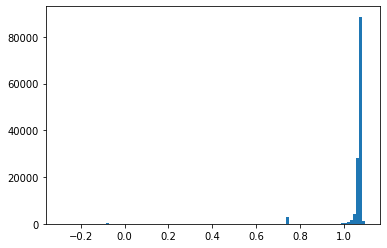

In [17]:
plt.hist(opdbDF.opdb_vmax, 100)
plt.show()

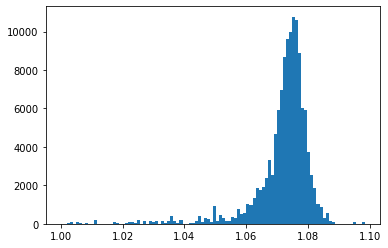

In [18]:
plt.hist(opdbDF[opdbDF.opdb_vmax >= 1].opdb_vmax, 100)
plt.show()

### Sorts Data

In [20]:
QUERY = """
SELECT DISTINCT
    tw.lot_id,
    tw.wafer_id,
    tw.family_code,
    tc.wafer_id_xy,
    tc.kerf_x,
    tc.kerf_y,
    sort.sort,
    sort.userlabel,
    sort.weight
FROM 
    dmiw.sortfactr sfr
    JOIN dmiw_systems.sort sort ON sfr.sortkey = sort.sortkey
    JOIN dmiw_systems.testedchip tc ON sfr.testedchipkey = tc.testedchipkey
    JOIN dmiw_systems.testedwafer tw ON sfr.testedwaferkey = tw.testedwaferkey
WHERE
    tw.family_code = 'Q6'
    AND sort.columnname = 'MFGPRE-F'
    AND tw.testprogramec IN ('0309YFQUWB','0309YFQUWA','118YFQUWA')

"""
sorts_df = ibmdata.isdw.query(QUERY)            

2022-04-05 23:56:55,906 INFO     ibmdata   : query execution time: 0:00:00.619994, fetching rows...
2022-04-05 23:56:58,149 INFO     ibmdata   : read 3096 rows, total 3096, 1381.0 rows/s, total time 0:00:02.952063
2022-04-05 23:56:58,163 INFO     ibmdata   : retrieved (3096, 9) (rows, cols) of data in 0:00:02.966459 from ISDW


In [21]:
sorts_df

,lot_id,wafer_id,family_code,wafer_id_xy,kerf_x,kerf_y,sort,userlabel,weight
0,A1ZAUA,A1ZAU-16,Q6,A1ZAU-16/17/32,12,33,26,9: CHIPLET FVSRL N,0
1,A1ZAUA,A1ZAU-16,Q6,A1ZAU-16/17/43,12,44,192,p: AGN 30C SLOW,100
2,A1ZAUA,A1ZAU-16,Q6,A1ZAU-16/17/65,12,66,1,$: AGN 32C FAST,100
3,A1ZAUA,A1ZAU-16,Q6,A1ZAU-16/17/76,12,77,251,P: NEST NO HOME N0N+N1S GOOD,0
4,A1ZAUA,A1ZAU-16,Q6,A1ZAU-16/17/87,12,88,1,$: AGN 32C FAST,100
...,...,...,...,...,...,...,...,...,...
3091,AA0474142.01E,AZA62-05,Q6,AZA62-05/89/87,84,88,191,M: AGN 32C SLOW,100
3092,AA0474142.01E,AZA62-05,Q6,AZA62-05/98/54,93,55,5,Z: PROBE PROTECT,0
3093,AA0474142.01E,AZA62-05,Q6,AZA62-05/98/65,93,66,5,Z: PROBE PROTECT,0
3094,IBMP10W20D,P10W2-01,Q6,P10W2-01/44/10,0,0,94,b: NEST ATPG H,0


In [22]:
sorts_df[['sort','userlabel','weight']].drop_duplicates()

,sort,userlabel,weight
0,26,9: CHIPLET FVSRL N,0
1,192,p: AGN 30C SLOW,100
2,1,$: AGN 32C FAST,100
3,251,P: NEST NO HOME N0N+N1S GOOD,0
5,247,o: AGN 26C UNIV,100
6,195,/: PGN 24-32C DCM-0,100
7,250,Q: NEST NO HOME,0
10,29,J: CHIPLET CHAIN N,0
11,249,R: AGN 30C FAST,100
12,191,M: AGN 32C SLOW,100


In [23]:
sorts_df[sorts_df.sort.eq(226)]

,lot_id,wafer_id,family_code,wafer_id_xy,kerf_x,kerf_y,sort,userlabel,weight
328,A1ZNKM,A1ZNK-04,Q6,A1ZNK-04/26/87,21,88,226,i: PGN vSCM DCM-1,100
343,A1ZNKM,A1ZNK-04,Q6,A1ZNK-04/44/54,39,55,226,i: PGN vSCM DCM-1,100
494,A1ZNK,A1ZNK-06,Q6,A1ZNK-06/35/98,30,99,226,i: PGN vSCM DCM-1,100
637,A1ZNK,A1ZNK-08,Q6,A1ZNK-08/17/87,12,88,226,i: PGN vSCM DCM-1,100
673,A1ZNK,A1ZNK-08,Q6,A1ZNK-08/53/98,48,99,226,i: PGN vSCM DCM-1,100
708,A1ZNK,A1ZNK-08,Q6,A1ZNK-08/98/54,93,55,226,i: PGN vSCM DCM-1,100
758,A1ZNK,A1ZNK-09,Q6,A1ZNK-09/62/65,57,66,226,i: PGN vSCM DCM-1,100
836,A1ZNK,A1ZNK-10,Q6,A1ZNK-10/62/54,57,55,226,i: PGN vSCM DCM-1,100
1089,A1ZNKN,A1ZNK-13,Q6,A1ZNK-13/8/65,3,66,226,i: PGN vSCM DCM-1,100
1126,A1ZNKN,A1ZNK-14,Q6,A1ZNK-14/35/76,30,77,226,i: PGN vSCM DCM-1,100


In [24]:
mergedDF = sorts_df.merge(opdbDF, on=['wafer_id','kerf_x','kerf_y'], how='left').reset_index(drop=True)
mergedDF

,lot_id,wafer_id,family_code,wafer_id_xy,kerf_x,kerf_y,sort,userlabel,weight,chipx,chipy,opdb_vmax,bucket
0,A1ZAUA,A1ZAU-16,Q6,A1ZAU-16/17/32,12,33,26,9: CHIPLET FVSRL N,0,17.0,32.0,1.083840,Other
1,A1ZAUA,A1ZAU-16,Q6,A1ZAU-16/17/43,12,44,192,p: AGN 30C SLOW,100,17.0,43.0,1.083840,Other
2,A1ZAUA,A1ZAU-16,Q6,A1ZAU-16/17/65,12,66,1,$: AGN 32C FAST,100,17.0,65.0,1.083840,Other
3,A1ZAUA,A1ZAU-16,Q6,A1ZAU-16/17/76,12,77,251,P: NEST NO HOME N0N+N1S GOOD,0,17.0,76.0,1.083840,Other
4,A1ZAUA,A1ZAU-16,Q6,A1ZAU-16/17/87,12,88,1,$: AGN 32C FAST,100,17.0,87.0,1.083840,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3091,AA0474142.01E,AZA62-05,Q6,AZA62-05/89/87,84,88,191,M: AGN 32C SLOW,100,89.0,87.0,1.073124,E4
3092,AA0474142.01E,AZA62-05,Q6,AZA62-05/98/54,93,55,5,Z: PROBE PROTECT,0,98.0,54.0,1.046000,E3
3093,AA0474142.01E,AZA62-05,Q6,AZA62-05/98/65,93,66,5,Z: PROBE PROTECT,0,98.0,65.0,1.046000,E3
3094,IBMP10W20D,P10W2-01,Q6,P10W2-01/44/10,0,0,94,b: NEST ATPG H,0,NaN,NaN,NaN,NaN


In [25]:
finalDF = mergedDF.dropna()
finalDF

,lot_id,wafer_id,family_code,wafer_id_xy,kerf_x,kerf_y,sort,userlabel,weight,chipx,chipy,opdb_vmax,bucket
0,A1ZAUA,A1ZAU-16,Q6,A1ZAU-16/17/32,12,33,26,9: CHIPLET FVSRL N,0,17.0,32.0,1.083840,Other
1,A1ZAUA,A1ZAU-16,Q6,A1ZAU-16/17/43,12,44,192,p: AGN 30C SLOW,100,17.0,43.0,1.083840,Other
2,A1ZAUA,A1ZAU-16,Q6,A1ZAU-16/17/65,12,66,1,$: AGN 32C FAST,100,17.0,65.0,1.083840,Other
3,A1ZAUA,A1ZAU-16,Q6,A1ZAU-16/17/76,12,77,251,P: NEST NO HOME N0N+N1S GOOD,0,17.0,76.0,1.083840,Other
4,A1ZAUA,A1ZAU-16,Q6,A1ZAU-16/17/87,12,88,1,$: AGN 32C FAST,100,17.0,87.0,1.083840,Other
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3089,AA0474142.01E,AZA62-05,Q6,AZA62-05/89/65,84,66,191,M: AGN 32C SLOW,100,89.0,65.0,1.073124,Other
3090,AA0474142.01E,AZA62-05,Q6,AZA62-05/89/76,84,77,191,M: AGN 32C SLOW,100,89.0,76.0,1.073124,Other
3091,AA0474142.01E,AZA62-05,Q6,AZA62-05/89/87,84,88,191,M: AGN 32C SLOW,100,89.0,87.0,1.073124,E4
3092,AA0474142.01E,AZA62-05,Q6,AZA62-05/98/54,93,55,5,Z: PROBE PROTECT,0,98.0,54.0,1.046000,E3


# Analysis

**To Do:**
1. Create column to determine AGN, PGN, or neither
2. Count number of chips with AGN, PGN sorts per wafer
3. Count number of chips with AGN, PGN sorts per wafer where radius_center_5_new in [e3,e4]
4. Count number of chips with AGN, PGN sorts per wafer where radius_center_5_new in [e3,e4] and OPDB_Vmax < 0.95V
5. Count number of chips with AGN, PGN sorts per wafer where radius_center_5_new in [e3,e4] and OPDB_Vmax < 1.00V
6. Calculate wafer yield
7. Calculate total average wafer yield 

**Instructions:**

For AGN and PGN separately 

Scenerio 0: calcualte yield for AGN and PGN not including sort 226 and (sort 226 / i: PGN vSCM DCM-1 ) as IOSCM  by wafer and then grand average over all wafers  

Scenario 1:  All e3/e4 die

Scenario 2: e3/e4 die with OPDB_Vmax < 0.95V 

Scenario 3: e3/e4 die with OPDB_Vmax < 1.0V


calculate wafer aveage for all wafers, and then calculate grand average over wafers 




In [26]:
AGNsorts = [192,1,247,249,191,248]
PGNsorts = [195,196]

In [27]:
AGN = finalDF[finalDF.sort.isin(AGNsorts)].groupby(['wafer_id']).weight.count().reset_index().rename(columns={'weight':'AGNcount'})
AGN['AGNyield'] = 100*AGN['AGNcount']/80
AGN

,wafer_id,AGNcount,AGNyield
0,A1ZAU-16,47,58.75
1,A1ZNK-01,50,62.50
2,A1ZNK-02,53,66.25
3,A1ZNK-03,50,62.50
4,A1ZNK-04,49,61.25
5,A1ZNK-05,49,61.25
6,A1ZNK-06,49,61.25
7,A1ZNK-07,52,65.00
8,A1ZNK-08,37,46.25
9,A1ZNK-09,54,67.50


In [28]:
PGN = finalDF[finalDF.sort.isin(PGNsorts)].groupby(['wafer_id']).weight.count().reset_index().rename(columns={'weight':'PGNcount'})
PGN['PGNyield'] = 100*PGN['PGNcount']/80
PGN

,wafer_id,PGNcount,PGNyield
0,A1ZAU-16,5,6.25
1,A1ZNK-01,7,8.75
2,A1ZNK-02,3,3.75
3,A1ZNK-03,6,7.50
4,A1ZNK-04,3,3.75
5,A1ZNK-05,8,10.00
6,A1ZNK-06,8,10.00
7,A1ZNK-07,9,11.25
8,A1ZNK-08,7,8.75
9,A1ZNK-09,8,10.00


In [29]:
AGN.merge(PGN, on=['wafer_id'])

,wafer_id,AGNcount,AGNyield,PGNcount,PGNyield
0,A1ZAU-16,47,58.75,5,6.25
1,A1ZNK-01,50,62.50,7,8.75
2,A1ZNK-02,53,66.25,3,3.75
3,A1ZNK-03,50,62.50,6,7.50
4,A1ZNK-04,49,61.25,3,3.75
5,A1ZNK-05,49,61.25,8,10.00
6,A1ZNK-06,49,61.25,8,10.00
7,A1ZNK-07,52,65.00,9,11.25
8,A1ZNK-08,37,46.25,7,8.75
9,A1ZNK-09,54,67.50,8,10.00


In [33]:
e3e4 = finalDF[finalDF.bucket.isin(['E3','E4'])]
e3e4

,lot_id,wafer_id,family_code,wafer_id_xy,kerf_x,kerf_y,sort,userlabel,weight,chipx,chipy,opdb_vmax,bucket
59,A1ZAUA,A1ZAU-16,Q6,A1ZAU-16/8/43,3,44,196,%: PGN 24-32C DCM-1,100,8.0,43.0,1.083840,E3
62,A1ZAUA,A1ZAU-16,Q6,A1ZAU-16/8/76,3,77,248,n: AGN 28C UNIV,100,8.0,76.0,0.511308,E4
63,A1ZAUA,A1ZAU-16,Q6,A1ZAU-16/80/21,75,22,138,L: LATCHUP DETECT,0,80.0,21.0,1.083840,E3
71,A1ZAUA,A1ZAU-16,Q6,A1ZAU-16/89/32,84,33,192,p: AGN 30C SLOW,100,89.0,32.0,1.083840,E3
76,A1ZAUA,A1ZAU-16,Q6,A1ZAU-16/89/87,84,88,192,p: AGN 30C SLOW,100,89.0,87.0,1.083840,E4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3078,AA0474142.01E,AZA62-05,Q6,AZA62-05/80/21,75,22,191,M: AGN 32C SLOW,100,80.0,21.0,1.073124,E3
3086,AA0474142.01E,AZA62-05,Q6,AZA62-05/89/32,84,33,191,M: AGN 32C SLOW,100,89.0,32.0,1.073124,E3
3091,AA0474142.01E,AZA62-05,Q6,AZA62-05/89/87,84,88,191,M: AGN 32C SLOW,100,89.0,87.0,1.073124,E4
3092,AA0474142.01E,AZA62-05,Q6,AZA62-05/98/54,93,55,5,Z: PROBE PROTECT,0,98.0,54.0,1.046000,E3


In [35]:
AGNs1 = e3e4[e3e4.sort.isin(AGNsorts)].groupby(['wafer_id']).weight.count().reset_index().rename(columns={'weight':'e3e4AGNcount'})
AGNs1['e3e4AGNyield'] = 100*AGNs1['e3e4AGNcount']/80
AGNs1

,wafer_id,e3e4AGNcount,e3e4AGNyield
0,A1ZAU-16,4,5.00
1,A1ZNK-01,3,3.75
2,A1ZNK-02,4,5.00
3,A1ZNK-03,4,5.00
4,A1ZNK-04,1,1.25
5,A1ZNK-05,4,5.00
6,A1ZNK-06,3,3.75
7,A1ZNK-07,3,3.75
8,A1ZNK-08,4,5.00
9,A1ZNK-09,4,5.00


In [36]:
PGNs1 = e3e4[e3e4.sort.isin(PGNsorts)].groupby(['wafer_id']).weight.count().reset_index().rename(columns={'weight':'e3e4PGNcount'})
PGNs1['e3e4PGNyield'] = 100*PGNs1['e3e4PGNcount']/80
PGNs1

,wafer_id,e3e4PGNcount,e3e4PGNyield
0,A1ZAU-16,1,1.25
1,A1ZNK-01,1,1.25
2,A1ZNK-03,1,1.25
3,A1ZNK-07,1,1.25
4,A1ZNK-11,2,2.50
5,A1ZNK-12,1,1.25
6,A1ZNK-13,1,1.25
7,A1ZNK-15,2,2.50
8,A1ZNK-22,2,2.50
9,A1ZNK-23,2,2.50


In [37]:
s2 = finalDF[(finalDF.bucket.isin(['E3','E4'])) & (finalDF.opdb_vmax < 0.95)]
s2

,lot_id,wafer_id,family_code,wafer_id_xy,kerf_x,kerf_y,sort,userlabel,weight,chipx,chipy,opdb_vmax,bucket
62,A1ZAUA,A1ZAU-16,Q6,A1ZAU-16/8/76,3,77,248,n: AGN 28C UNIV,100,8.0,76.0,0.511308,E4
1090,A1ZNKN,A1ZNK-13,Q6,A1ZNK-13/8/76,3,77,5,Z: PROBE PROTECT,0,8.0,76.0,0.750000,E4
1410,A1ZNKQ,A1ZNK-17,Q6,A1ZNK-17/8/76,3,77,41,a: NEST AB_SRAM,0,8.0,76.0,0.765756,E4
2603,A202C,A202C-07,Q6,A202C-07/8/76,3,77,5,Z: PROBE PROTECT,0,8.0,76.0,0.750000,E4


In [39]:
AGNs2 = s2[s2.sort.isin(AGNsorts)].groupby(['wafer_id']).weight.count().reset_index().rename(columns={'weight':'e3e4_opdb0p95_AGNcount'})
AGNs2['e3e4_opdb0p95_AGNyield'] = 100*AGNs2['e3e4_opdb0p95_AGNcount']/80
AGNs2

,wafer_id,e3e4_opdb0p95_AGNcount,e3e4_opdb0p95_AGNyield
0,A1ZAU-16,1,1.25


In [40]:
PGNs2 = s2[s2.sort.isin(PGNsorts)].groupby(['wafer_id']).weight.count().reset_index().rename(columns={'weight':'e3e4_opdb0p95_PGNcount'})
PGNs2['e3e4_opdb0p95_PGNyield'] = 100*PGNs2['e3e4_opdb0p95_PGNcount']/80
PGNs2

,wafer_id,e3e4_opdb0p95_PGNcount,e3e4_opdb0p95_PGNyield


In [41]:
s3 = finalDF[(finalDF.bucket.isin(['E3','E4'])) & (finalDF.opdb_vmax < 1.0)]
s3

,lot_id,wafer_id,family_code,wafer_id_xy,kerf_x,kerf_y,sort,userlabel,weight,chipx,chipy,opdb_vmax,bucket
62,A1ZAUA,A1ZAU-16,Q6,A1ZAU-16/8/76,3,77,248,n: AGN 28C UNIV,100,8.0,76.0,0.511308,E4
1090,A1ZNKN,A1ZNK-13,Q6,A1ZNK-13/8/76,3,77,5,Z: PROBE PROTECT,0,8.0,76.0,0.750000,E4
1330,A1ZNKQ,A1ZNK-16,Q6,A1ZNK-16/8/76,3,77,191,M: AGN 32C SLOW,100,8.0,76.0,0.996480,E4
1410,A1ZNKQ,A1ZNK-17,Q6,A1ZNK-17/8/76,3,77,41,a: NEST AB_SRAM,0,8.0,76.0,0.765756,E4
1727,A1ZNKR,A1ZNK-21,Q6,A1ZNK-21/8/43,3,44,192,p: AGN 30C SLOW,100,8.0,43.0,0.996840,E3
2603,A202C,A202C-07,Q6,A202C-07/8/76,3,77,5,Z: PROBE PROTECT,0,8.0,76.0,0.750000,E4


In [42]:
AGNs3 = s3[s3.sort.isin(AGNsorts)].groupby(['wafer_id']).weight.count().reset_index().rename(columns={'weight':'e3e4_opdb1p00_AGNcount'})
AGNs3['e3e4_opdb1p00_AGNyield'] = 100*AGNs3['e3e4_opdb1p00_AGNcount']/80
AGNs3

,wafer_id,e3e4_opdb1p00_AGNcount,e3e4_opdb1p00_AGNyield
0,A1ZAU-16,1,1.25
1,A1ZNK-16,1,1.25
2,A1ZNK-21,1,1.25


In [43]:
PGNs3 = s3[s3.sort.isin(PGNsorts)].groupby(['wafer_id']).weight.count().reset_index().rename(columns={'weight':'e3e4_opdb1p00_PGNcount'})
PGNs3['e3e4_opdb1p00_PGNyield'] = 100*PGNs3['e3e4_opdb1p00_PGNcount']/80
PGNs3

,wafer_id,e3e4_opdb1p00_PGNcount,e3e4_opdb1p00_PGNyield


In [49]:
dataframes = [AGN,PGN,AGNs1,PGNs1,AGNs2,PGNs2,AGNs3,PGNs3]
waferDF = reduce(lambda  left,right: pd.merge(left,right,on=['wafer_id'],how='left'), dataframes).fillna(0)
waferDF

,wafer_id,AGNcount,AGNyield,PGNcount,PGNyield,e3e4AGNcount,e3e4AGNyield,e3e4PGNcount,e3e4PGNyield,e3e4_opdb0p95_AGNcount,e3e4_opdb0p95_AGNyield,e3e4_opdb0p95_PGNcount,e3e4_opdb0p95_PGNyield,e3e4_opdb1p00_AGNcount,e3e4_opdb1p00_AGNyield,e3e4_opdb1p00_PGNcount,e3e4_opdb1p00_PGNyield
0,A1ZAU-16,47,58.75,5,6.25,4,5.00,1.0,1.25,1.0,1.25,0.0,0.0,1.0,1.25,0.0,0.0
1,A1ZNK-01,50,62.50,7,8.75,3,3.75,1.0,1.25,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0
2,A1ZNK-02,53,66.25,3,3.75,4,5.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0
3,A1ZNK-03,50,62.50,6,7.50,4,5.00,1.0,1.25,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0
4,A1ZNK-04,49,61.25,3,3.75,1,1.25,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0
5,A1ZNK-05,49,61.25,8,10.00,4,5.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0
6,A1ZNK-06,49,61.25,8,10.00,3,3.75,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0
7,A1ZNK-07,52,65.00,9,11.25,3,3.75,1.0,1.25,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0
8,A1ZNK-08,37,46.25,7,8.75,4,5.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0
9,A1ZNK-09,54,67.50,8,10.00,4,5.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0


In [60]:
comp = waferDF.mean().reset_index()
comp.rename(columns={'0':'Average of All Wafers'})

,index,0
0,AGNcount,46.743590
1,AGNyield,58.429487
2,PGNcount,6.564103
3,PGNyield,8.205128
4,e3e4AGNcount,3.487179
5,e3e4AGNyield,4.358974
6,e3e4PGNcount,0.717949
7,e3e4PGNyield,0.897436
8,e3e4_opdb0p95_AGNcount,0.025641
9,e3e4_opdb0p95_AGNyield,0.032051


In [53]:
waferDF.to_csv('~/Downloads/AGNPGNyields.csv')